# As the data scientist of Statsville, you want to estimate its population $N$.

# But there's way too many people to try and count them directly

# You use the capture-recapture method

***

# Step 1:

## Get a random sample of $n$ people from the city and record their names

## Then, the probability of being recorded is $\frac{n}{N}$

***

# Step 2:

## Some time later, get an independent random sample of $K$ people from the city and record their names

## Then, see how many of those $K$ people were also in your first sample. Let the number of people who appear in both be $k$

## So, the probability of being recorded in this new sample is $\frac{k}{K}$

***

# Step 3:

## But, since these were both independent random samples from the population we expect that $\frac{n}{N} = \frac{k}{K}$

## So we estimate the population size as $\hat{N} = \frac{Kn}{k}$

***

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
def capture(population, num):
    #get random members to capture
    indices_to_capture = np.random.choice(list(population.keys()), num, replace=False)
    
    #tag them
    for idx in indices_to_capture:
        population[idx] = True

In [77]:
def recapture(population, num):
    #get random members to recapture
    indices_to_recapture = np.random.choice(list(population.keys()), num, replace=False)
   
    #find out how many of them were previously marked
    num_prev_marked = np.sum([population[idx] for idx in indices_to_recapture])
    return num_prev_marked

In [118]:
def get_estimated_pop_size(population_size, num_captured, num_recaptured):
    #define the population
    population = {i: False for i in range(population_size)}
    
    #capture a random sample
    capture(population, num_captured)
    
    #recapture a random sample
    num_prev_marked = recapture(population, num_recaptured)
    
    #calculate estimated pop size
    if num_prev_marked > 0:
        return int(num_captured*num_recaptured/num_prev_marked)
    return np.nan

In [173]:
def simulate_runs(population_size, num_captured, num_recaptured, num_runs=10000):

    #do many runs of the above
    est_pop_sizes = [get_estimated_pop_size(population_size, num_captured, num_recaptured) for _ in range(num_runs)]
    est_pop_sizes = np.array([item for item in est_pop_sizes if not np.isnan(item)])

    plt.figure(figsize=(10,4))
    sns.distplot(est_pop_sizes)
    plt.axvline(np.mean(est_pop_sizes)-np.std(est_pop_sizes), color='r', linestyle='--')
    plt.axvline(np.mean(est_pop_sizes)+np.std(est_pop_sizes), color='r', linestyle='--')
    plt.axvline(population_size, color='k')
    plt.title('True Pop Size: %s\nEstimated Pop Size: (%s,%s)'%(population_size, int(est_pop_sizes.mean()-est_pop_sizes.std()), int(est_pop_sizes.mean()+est_pop_sizes.std())), fontsize=20)

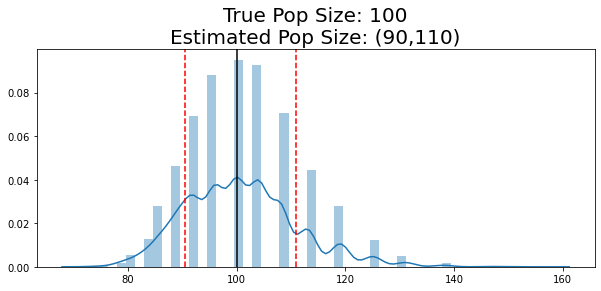

In [175]:
simulate_runs(100, 50, 50)

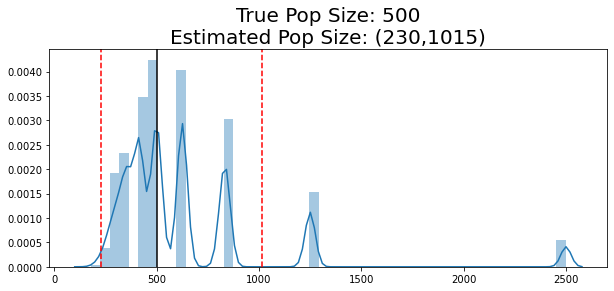

In [176]:
simulate_runs(500, 50, 50)

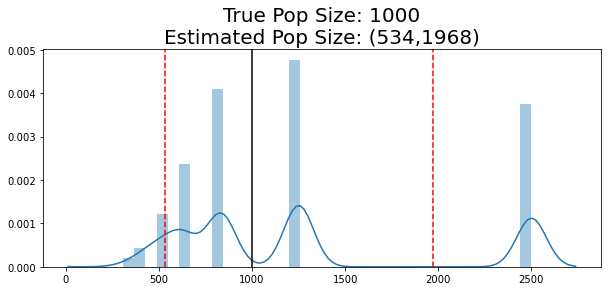

In [177]:
simulate_runs(1000, 50, 50)